<a href="https://colab.research.google.com/github/shivannadm/Data_Science_path/blob/main/01_lstm_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
df=pd.read_csv('/content/sample_data/TATA.csv')
df.head()

,Date,Close,Open,High,Low,Volume
0,06-12-2021,467.20,480.10,480.90,466.00,17473075.0
1,07-12-2021,481.80,476.85,484.90,471.00,21280797.0
2,08-12-2021,493.90,484.50,495.95,483.50,20581817.0
3,09-12-2021,493.95,498.00,498.50,489.55,16951593.0
4,10-12-2021,494.45,487.75,496.80,486.55,14567815.0


In [32]:
df1=df.reset_index()['Close']

In [28]:
df1

,Close
0,467.2
1,481.8
2,493.9
3,493.95
4,494.45
...,...
660,993.15
661,974.65
662,965.2
663,925.7


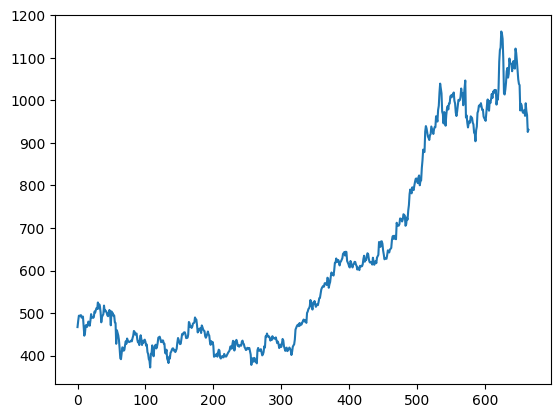

In [33]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [34]:
import numpy as np

In [35]:
df1

,Close
0,467.20
1,481.80
2,493.90
3,493.95
4,494.45
...,...
660,993.15
661,974.65
662,965.20
663,925.70


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
print(df1)

[[0.12019505]
 [0.13868659]
 [0.15401178]
 [0.15407511]
 [0.15470838]
 [0.15584827]
 [0.14831233]
 [0.15116205]
 [0.15154202]
 [0.12399468]
 [0.09467418]
 [0.10297005]
 [0.12437464]
 [0.12671775]
 [0.12070167]
 [0.1251979 ]
 [0.13666012]
 [0.13134064]
 [0.12424799]
 [0.13944652]
 [0.15869799]
 [0.14856564]
 [0.14875562]
 [0.14761573]
 [0.14983218]
 [0.16642391]
 [0.16338421]
 [0.17092014]
 [0.1768729 ]
 [0.17427649]
 [0.1934013 ]
 [0.17541638]
 [0.18814515]
 [0.18162244]
 [0.16408081]
 [0.13444367]
 [0.14976886]
 [0.15464505]
 [0.15831803]
 [0.18421886]
 [0.16718384]
 [0.16984358]
 [0.16743715]
 [0.16249763]
 [0.15489836]
 [0.15255525]
 [0.16332088]
 [0.17117345]
 [0.16028117]
 [0.12557786]
 [0.16680388]
 [0.15977456]
 [0.16167437]
 [0.15306187]
 [0.15470838]
 [0.13419036]
 [0.13260718]
 [0.07048319]
 [0.11075929]
 [0.10353999]
 [0.09537078]
 [0.08207207]
 [0.05693116]
 [0.02748401]
 [0.02463429]
 [0.04255589]
 [0.05990754]
 [0.05807105]
 [0.04990184]
 [0.0523716 ]
 [0.06662023]
 [0.07

In [38]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [39]:
training_size,test_size

(432, 233)

In [40]:
train_data

array([[0.12019505],
       [0.13868659],
       [0.15401178],
       [0.15407511],
       [0.15470838],
       [0.15584827],
       [0.14831233],
       [0.15116205],
       [0.15154202],
       [0.12399468],
       [0.09467418],
       [0.10297005],
       [0.12437464],
       [0.12671775],
       [0.12070167],
       [0.1251979 ],
       [0.13666012],
       [0.13134064],
       [0.12424799],
       [0.13944652],
       [0.15869799],
       [0.14856564],
       [0.14875562],
       [0.14761573],
       [0.14983218],
       [0.16642391],
       [0.16338421],
       [0.17092014],
       [0.1768729 ],
       [0.17427649],
       [0.1934013 ],
       [0.17541638],
       [0.18814515],
       [0.18162244],
       [0.16408081],
       [0.13444367],
       [0.14976886],
       [0.15464505],
       [0.15831803],
       [0.18421886],
       [0.16718384],
       [0.16984358],
       [0.16743715],
       [0.16249763],
       [0.15489836],
       [0.15255525],
       [0.16332088],
       [0.171

In [41]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [43]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [44]:
print(X_train.shape), print(y_train.shape)

(331, 100)
(331,)


(None, None)

In [45]:
print(X_test.shape), print(ytest.shape)

(132, 100)
(132,)


(None, None)

In [48]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [49]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [50]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - loss: 0.0139 - val_loss: 0.0344
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - loss: 0.0048 - val_loss: 0.1290
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.0032 - val_loss: 0.0082
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 9.1442e-04 - val_loss: 0.0084
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 8.7249e-04 - val_loss: 0.0034
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 8.1099e-04 - val_loss: 0.0044
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 7.6589e-04 - val_loss: 0.0036
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - loss: 8.0087e-04 - val_loss: 0.0040
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 17

In [53]:
import tensorflow as tf

In [54]:
tf.__version__

'2.17.1'

In [55]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [56]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [57]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

477.04153628830795

In [58]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1027.433832269536

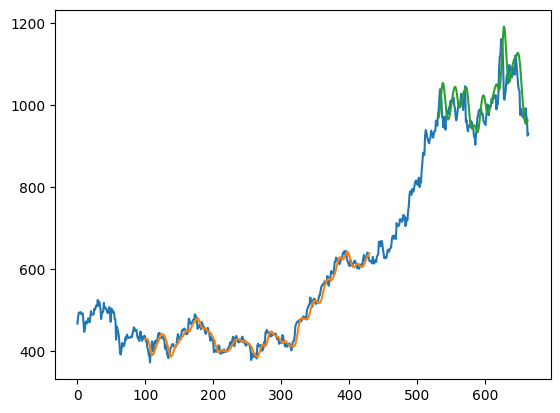

In [59]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
len(test_data)

233

In [72]:
x_input=test_data[133:].reshape(1,-1)
x_input.shape

(1, 100)

In [73]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [74]:
temp_input

[0.8302197454246089,
 0.8119815084541827,
 0.8155278323095435,
 0.7805078842378569,
 0.8103350009499083,
 0.8333861060097524,
 0.8540941042365905,
 0.7440314102970046,
 0.7502374770438857,
 0.7282629345829902,
 0.7144576024317649,
 0.7262364638084985,
 0.7333291115192196,
 0.7285162434298017,
 0.7473244253055539,
 0.7450446456842504,
 0.7424482300044329,
 0.7285795706415045,
 0.723576720916978,
 0.6986891267177507,
 0.6974859096953961,
 0.6732949148249002,
 0.7062883921220949,
 0.7168007092647711,
 0.7576467608131213,
 0.7635361915014881,
 0.7786713950984737,
 0.7806978658729656,
 0.7770882148059021,
 0.7866506237730352,
 0.7771515420176048,
 0.7663225888164144,
 0.767462478627066,
 0.7466278259768221,
 0.7418782850991069,
 0.738015325185232,
 0.7340257108479514,
 0.7596732315876132,
 0.7820277373187258,
 0.7976062313976314,
 0.771325438540941,
 0.7641694636185169,
 0.7927300360965107,
 0.7869672598315495,
 0.7983028307263632,
 0.8139446520169716,
 0.8019758090051295,
 0.82135393578620

In [75]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.74481004]
101
1 day input [0.81198151 0.81552783 0.78050788 0.810335   0.83338611 0.8540941
 0.74403141 0.75023748 0.72826293 0.7144576  0.72623646 0.73332911
 0.72851624 0.74732443 0.74504465 0.74244823 0.72857957 0.72357672
 0.69868913 0.69748591 0.67329491 0.70628839 0.71680071 0.75764676
 0.76353619 0.7786714  0.78069787 0.77708821 0.78665062 0.77715154
 0.76632259 0.76746248 0.74662783 0.74187829 0.73801533 0.73402571
 0.75967323 0.78202774 0.79760623 0.77132544 0.76416946 0.79273004
 0.78696726 0.79830283 0.81394465 0.80197581 0.82135394 0.81622443
 0.82597682 0.82179723 0.82610348 0.78234437 0.79899943 0.7972896
 0.83009309 0.91020201 0.944842   0.9520613  1.         0.99341397
 0.9778988  0.91742132 0.81584447 0.8124248  0.82705338 0.84788804
 0.88126148 0.89145716 0.86270661 0.87397885 0.91957444 0.90608575
 0.90507251 0.90291938 0.88170477 0.90285606 0.9120385  0.89285036
 0.88943069 0.94908492 0.93603952 0.91235514 0.88259135 0.85751377
 0.84402508 0.8403521  0.76499272 0

In [96]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [97]:
import matplotlib.pyplot as plt

In [98]:
len(df1)

665

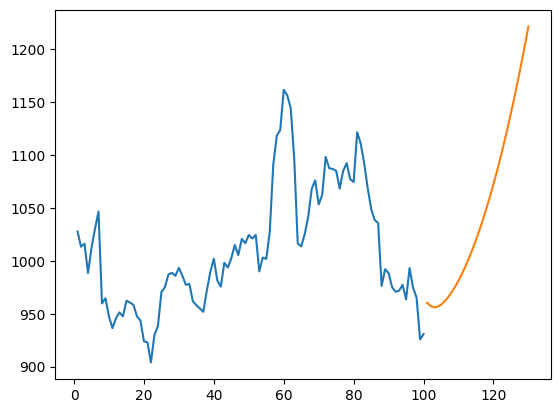

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[565:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

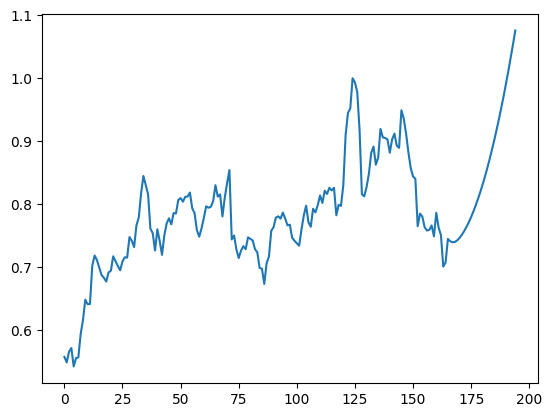

In [86]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[500:])

In [87]:
df3=scaler.inverse_transform(df3).tolist()

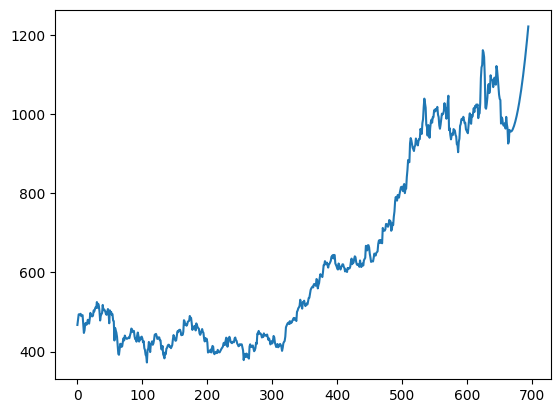

In [88]:
plt.plot(df3)